In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from wandb import Api

# https://stackoverflow.com/questions/24943991/change-grid-interval-and-specify-tick-labels
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

%matplotlib inline

In [11]:
colors = plt.cm.RdYlBu(np.linspace(0.0, 1.0, 20))
lapo_plusl_cl = colors[0]
lapo_plus_cl = colors[4]
lapo_cl = colors[6]
bc_cl = colors[-1]
idm_cl = colors[-5]

In [5]:
labeled_data_paths = ("1000x2", "1000x4", "1000x8", "1000x16", "1000x32", "1000x64", "1000x128")


def get_sweep_res(
    all_runs,
    sweep_id,
    return_key="decoder/eval_returns_mean",
    data_key="decoder.data_path",
    data_paths=labeled_data_paths,
):
    means, stds = [], []
    sweep_runs = [run for run in all_runs if hasattr(run.sweep, "id") and run.sweep.id == sweep_id]
    for d in data_paths:
        runs = [run for run in sweep_runs if d in run.config[data_key]]
        assert len(runs) == 3

        means.append(np.mean([run.summary[return_key] for run in runs]))
        stds.append(np.std([run.summary[return_key] for run in runs]))
    return np.array(means), np.array(stds)


def get_bc_sweep_res(all_runs, sweep_id, env_name="hopper"):
    means, stds = [], []
    sweep_runs = [run for run in all_runs if hasattr(run.sweep, "id") and run.sweep.id == sweep_id]
    for d in ["1000x2", "1000x4", "1000x8", "1000x16", "1000x32", "1000x64", "1000x128"]:
        runs = [run for run in sweep_runs if d in run.config["data_path"] and env_name in run.config["data_path"]]
        assert len(runs) == 3
        means.append(np.mean([run.summary["eval_returns_mean"] for run in runs]))
        stds.append(np.std([run.summary["eval_returns_mean"] for run in runs]))
    return np.array(means), np.array(stds)

In [4]:
api = Api()
runs = api.runs("state-machine/lapo")

In [6]:
# also listed in the paper appendix
bc = {
    "hopper": 253,
    "walker": 749,
    "cheetah": 823,
    "humanoid": 428,
}
bc_vanilla = {
    "hopper": 300,
    "walker": 735,
    "cheetah": 840,
    "humanoid": 601,
}
labels = np.array([2, 4, 8, 16, 32, 64, 128])

# Hopper
hopper = {
    "lapo": get_sweep_res(runs, "ov3oew2j")[0],
    "laom": get_sweep_res(runs, "va3ihspt")[0],
    "laom_labeled": get_sweep_res(runs, "q9p6718y", data_key="lapo.labeled_data_path")[0],
    "bc": get_bc_sweep_res(runs, "o0xvgeo9", "hopper")[0],
    "idm": get_sweep_res(runs, "dv44m5rv", data_key="idm.data_path", return_key="bc/eval_returns_mean")[0],
}
hopper_std = {
    "lapo": get_sweep_res(runs, "ov3oew2j")[1],
    "laom": get_sweep_res(runs, "va3ihspt")[1],
    "laom_labeled": get_sweep_res(runs, "q9p6718y", data_key="lapo.labeled_data_path")[1],
    "bc": get_bc_sweep_res(runs, "o0xvgeo9", "hopper")[1],
    "idm": get_sweep_res(runs, "dv44m5rv", data_key="idm.data_path", return_key="bc/eval_returns_mean")[1],
}
hopper_norm = {k: v / bc["hopper"] for k, v in hopper.items()}
hopper_std_norm = {k: v / bc["hopper"] for k, v in hopper_std.items()}

## vanilla
hopper_vanilla = {
    "lapo": get_sweep_res(runs, "0vpryf1m")[0],
    "laom": get_sweep_res(runs, "6pv1if3t")[0],
    "laom_labeled": get_sweep_res(runs, "zs346642", data_key="lapo.labeled_data_path")[0],
    "bc": get_bc_sweep_res(runs, "kjmsb2kq", "hopper")[0],
    "idm": get_sweep_res(runs, "dbtyx8ld", data_key="idm.data_path", return_key="bc/eval_returns_mean")[0],
}
hopper_vanilla_std = {
    "lapo": get_sweep_res(runs, "0vpryf1m")[1],
    "laom": get_sweep_res(runs, "6pv1if3t")[1],
    "laom_labeled": get_sweep_res(runs, "zs346642", data_key="lapo.labeled_data_path")[1],
    "bc": get_bc_sweep_res(runs, "kjmsb2kq", "hopper")[1],
    "idm": get_sweep_res(runs, "dbtyx8ld", data_key="idm.data_path", return_key="bc/eval_returns_mean")[1],
}
hopper_vanilla_norm = {k: v / bc_vanilla["hopper"] for k, v in hopper_vanilla.items()}
hopper_vanilla_std_norm = {k: v / bc_vanilla["hopper"] for k, v in hopper_vanilla_std.items()}

## mixed
hopper_mixed = {
    "lapo": get_sweep_res(runs, "f4bxo2ht")[0],
    "laom": get_sweep_res(runs, "btds6jcz")[0],
    "laom_labeled": get_sweep_res(runs, "1dnsfsft", data_key="lapo.labeled_data_path")[0],
}
hopper_mixed_std = {
    "lapo": get_sweep_res(runs, "f4bxo2ht")[1],
    "laom": get_sweep_res(runs, "btds6jcz")[1],
    "laom_labeled": get_sweep_res(runs, "1dnsfsft", data_key="lapo.labeled_data_path")[1],
}
hopper_mixed_norm = {k: v / bc["hopper"] for k, v in hopper_mixed.items()}
hopper_mixed_std_norm = {k: v / bc["hopper"] for k, v in hopper_mixed_std.items()}

# Walker
walker = {
    "lapo": get_sweep_res(runs, "ouoivth5")[0],
    "laom": get_sweep_res(runs, "kctyu1qc")[0],
    "laom_labeled": get_sweep_res(runs, "wrd5hdg3", data_key="lapo.labeled_data_path")[0],
    "bc": get_bc_sweep_res(runs, "o0xvgeo9", "walker")[0],
    "idm": get_sweep_res(runs, "6v89skk6", data_key="idm.data_path", return_key="bc/eval_returns_mean")[0],
    # rebuttal, bc upon embeddings from laom encoder
    "laom_bc": get_sweep_res(runs, "hiqm4w9d")[0],
    "laom_labeled_bc": get_sweep_res(runs, "4hldk4b7", data_key="lapo.labeled_data_path")[0],
    "laom_fsq": get_sweep_res(runs, "qfaymqth")[0],
}
walker_std = {
    "lapo": get_sweep_res(runs, "ouoivth5")[1],
    "laom": get_sweep_res(runs, "kctyu1qc")[1],
    "laom_labeled": get_sweep_res(runs, "wrd5hdg3", data_key="lapo.labeled_data_path")[1],
    "bc": get_bc_sweep_res(runs, "o0xvgeo9", "walker")[1],
    "idm": get_sweep_res(runs, "6v89skk6", data_key="idm.data_path", return_key="bc/eval_returns_mean")[1],
    # rebuttal, bc upon embeddings from laom encoder
    "laom_bc": get_sweep_res(runs, "hiqm4w9d")[1],
    "laom_labeled_bc": get_sweep_res(runs, "4hldk4b7", data_key="lapo.labeled_data_path")[1],
    "laom_fsq": get_sweep_res(runs, "qfaymqth")[1],
}
walker_norm = {k: v / bc["walker"] for k, v in walker.items()}
walker_std_norm = {k: v / bc["walker"] for k, v in walker_std.items()}

## vanilla
walker_vanilla = {
    "lapo": get_sweep_res(runs, "uqwgihdw")[0],
    "laom": np.concatenate(
        [
            get_sweep_res(runs, "1fkt6dz7", data_paths=labeled_data_paths[:-2])[0],
            get_sweep_res(runs, "iq5kvrhj", data_paths=labeled_data_paths[-2:])[0],
        ]
    ),
    "laom_labeled": get_sweep_res(runs, "yx51b6mx", data_key="lapo.labeled_data_path")[0],
    "bc": get_bc_sweep_res(runs, "kjmsb2kq", "walker")[0],
    "idm": get_sweep_res(runs, "x4ir3p1m", data_key="idm.data_path", return_key="bc/eval_returns_mean")[0],
}
walker_vanilla_std = {
    "lapo": get_sweep_res(runs, "uqwgihdw")[1],
    "laom": np.concatenate(
        [
            get_sweep_res(runs, "1fkt6dz7", data_paths=labeled_data_paths[:-2])[1],
            get_sweep_res(runs, "iq5kvrhj", data_paths=labeled_data_paths[-2:])[1],
        ]
    ),
    "laom_labeled": get_sweep_res(runs, "yx51b6mx", data_key="lapo.labeled_data_path")[1],
    "bc": get_bc_sweep_res(runs, "kjmsb2kq", "walker")[1],
    "idm": get_sweep_res(runs, "x4ir3p1m", data_key="idm.data_path", return_key="bc/eval_returns_mean")[1],
}
walker_vanilla_norm = {k: v / bc_vanilla["walker"] for k, v in walker_vanilla.items()}
walker_vanilla_std_norm = {k: v / bc_vanilla["walker"] for k, v in walker_vanilla_std.items()}

## mixed
walker_mixed = {
    "lapo": get_sweep_res(runs, "m9lxbodp")[0],
    "laom": get_sweep_res(runs, "de0ijy6r")[0],
    "laom_labeled": get_sweep_res(runs, "hypdm6yk", data_key="lapo.labeled_data_path")[0],
}
walker_mixed_std = {
    "lapo": get_sweep_res(runs, "m9lxbodp")[1],
    "laom": get_sweep_res(runs, "de0ijy6r")[1],
    "laom_labeled": get_sweep_res(runs, "hypdm6yk", data_key="lapo.labeled_data_path")[1],
}
walker_mixed_norm = {k: v / bc["walker"] for k, v in walker_mixed.items()}
walker_mixed_std_norm = {k: v / bc["walker"] for k, v in walker_mixed_std.items()}

# cheetah
cheetah = {
    "lapo": get_sweep_res(runs, "bpoyn1ho")[0],
    "laom": get_sweep_res(runs, "84h0yclj")[0],
    "laom_labeled": get_sweep_res(runs, "4hji3tld", data_key="lapo.labeled_data_path")[0],
    "bc": get_bc_sweep_res(runs, "o0xvgeo9", "cheetah")[0],
    "idm": get_sweep_res(runs, "3mxq9ssr", data_key="idm.data_path", return_key="bc/eval_returns_mean")[0],
}
cheetah_std = {
    "lapo": get_sweep_res(runs, "bpoyn1ho")[1],
    "laom": get_sweep_res(runs, "84h0yclj")[1],
    "laom_labeled": get_sweep_res(runs, "4hji3tld", data_key="lapo.labeled_data_path")[1],
    "bc": get_bc_sweep_res(runs, "o0xvgeo9", "cheetah")[1],
    "idm": get_sweep_res(runs, "3mxq9ssr", data_key="idm.data_path", return_key="bc/eval_returns_mean")[1],
}
cheetah_norm = {k: v / bc["cheetah"] for k, v in cheetah.items()}
cheetah_std_norm = {k: v / bc["cheetah"] for k, v in cheetah_std.items()}

## vanilla
cheetah_vanilla = {
    "lapo": get_sweep_res(runs, "fgczl8gc")[0],
    "laom": get_sweep_res(runs, "4k9tv7qz")[0],
    "laom_labeled": get_sweep_res(runs, "c0arczi2", data_key="lapo.labeled_data_path")[0],
    "bc": get_bc_sweep_res(runs, "kjmsb2kq", "cheetah")[0],
    "idm": get_sweep_res(runs, "pna1o6sx", data_key="idm.data_path", return_key="bc/eval_returns_mean")[0],
}
cheetah_vanilla_std = {
    "lapo": get_sweep_res(runs, "fgczl8gc")[1],
    "laom": get_sweep_res(runs, "4k9tv7qz")[1],
    "laom_labeled": get_sweep_res(runs, "c0arczi2", data_key="lapo.labeled_data_path")[1],
    "bc": get_bc_sweep_res(runs, "kjmsb2kq", "cheetah")[1],
    "idm": get_sweep_res(runs, "pna1o6sx", data_key="idm.data_path", return_key="bc/eval_returns_mean")[1],
}
cheetah_vanilla_norm = {k: v / bc_vanilla["cheetah"] for k, v in cheetah_vanilla.items()}
cheetah_vanilla_std_norm = {k: v / bc_vanilla["cheetah"] for k, v in cheetah_vanilla_std.items()}

## mixed
cheetah_mixed = {
    "lapo": get_sweep_res(runs, "cx1l07rw")[0],
    "laom": get_sweep_res(runs, "rqwpcb6z")[0],
    "laom_labeled": get_sweep_res(runs, "xffzmwy4", data_key="lapo.labeled_data_path")[0],
}
cheetah_mixed_std = {
    "lapo": get_sweep_res(runs, "cx1l07rw")[1],
    "laom": get_sweep_res(runs, "rqwpcb6z")[1],
    "laom_labeled": get_sweep_res(runs, "xffzmwy4", data_key="lapo.labeled_data_path")[1],
}
cheetah_mixed_norm = {k: v / bc["cheetah"] for k, v in cheetah_mixed.items()}
cheetah_mixed_std_norm = {k: v / bc["cheetah"] for k, v in cheetah_mixed_std.items()}

# humanoid
humanoid = {
    "lapo": get_sweep_res(runs, "3gqi2h3r")[0],
    "laom": get_sweep_res(runs, "axe0b51k")[0],
    "laom_labeled": get_sweep_res(runs, "cxq1mdoy", data_key="lapo.labeled_data_path")[0],
    "bc": get_bc_sweep_res(runs, "o0xvgeo9", "humanoid")[0],
    "idm": get_sweep_res(runs, "pmuogjx6", data_key="idm.data_path", return_key="bc/eval_returns_mean")[0],
}
humanoid_std = {
    "lapo": get_sweep_res(runs, "3gqi2h3r")[1],
    "laom": get_sweep_res(runs, "axe0b51k")[1],
    "laom_labeled": get_sweep_res(runs, "cxq1mdoy", data_key="lapo.labeled_data_path")[1],
    "bc": get_bc_sweep_res(runs, "o0xvgeo9", "humanoid")[1],
    "idm": get_sweep_res(runs, "pmuogjx6", data_key="idm.data_path", return_key="bc/eval_returns_mean")[1],
}
humanoid_norm = {k: v / bc["humanoid"] for k, v in humanoid.items()}
humanoid_std_norm = {k: v / bc["humanoid"] for k, v in humanoid_std.items()}

## vanilla
humanoid_vanilla = {
    "lapo": get_sweep_res(runs, "lozrhyht")[0],
    "laom": get_sweep_res(runs, "auk62wf4")[0],
    "laom_labeled": get_sweep_res(runs, "v9drez1m", data_key="lapo.labeled_data_path")[0],
    "bc": get_bc_sweep_res(runs, "kjmsb2kq", "humanoid")[0],
    "idm": get_sweep_res(runs, "1np2x138", data_key="idm.data_path", return_key="bc/eval_returns_mean")[0],
}
humanoid_vanilla_std = {
    "lapo": get_sweep_res(runs, "lozrhyht")[1],
    "laom": get_sweep_res(runs, "auk62wf4")[1],
    "laom_labeled": get_sweep_res(runs, "v9drez1m", data_key="lapo.labeled_data_path")[1],
    "bc": get_bc_sweep_res(runs, "kjmsb2kq", "humanoid")[1],
    "idm": get_sweep_res(runs, "1np2x138", data_key="idm.data_path", return_key="bc/eval_returns_mean")[1],
}
humanoid_vanilla_norm = {k: v / bc_vanilla["humanoid"] for k, v in humanoid_vanilla.items()}
humanoid_vanilla_std_norm = {k: v / bc_vanilla["humanoid"] for k, v in humanoid_vanilla_std.items()}

## mixed
humanoid_mixed = {
    "lapo": get_sweep_res(runs, "ej7kct55")[0],
    "laom": get_sweep_res(runs, "9pg40ysh")[0],
    "laom_labeled": get_sweep_res(runs, "8855ywlc", data_key="lapo.labeled_data_path")[0],
}
humanoid_mixed_std = {
    "lapo": get_sweep_res(runs, "ej7kct55")[1],
    "laom": get_sweep_res(runs, "9pg40ysh")[1],
    "laom_labeled": get_sweep_res(runs, "8855ywlc", data_key="lapo.labeled_data_path")[1],
}
humanoid_mixed_norm = {k: v / bc["humanoid"] for k, v in humanoid_mixed.items()}
humanoid_mixed_std_norm = {k: v / bc["humanoid"] for k, v in humanoid_mixed_std.items()}

In [10]:
mean_res = {}
mean_res_std = {}
for method in humanoid_norm.keys():
    values = np.vstack([d[method] for d in [hopper_norm, walker_norm, cheetah_norm, humanoid_norm]])
    values_std = np.vstack([d[method] for d in [hopper_std_norm, walker_std_norm, cheetah_std_norm, humanoid_std_norm]])

    mean_res[method] = np.mean(values, axis=0)
    mean_res_std[method] = np.mean(values_std, axis=0)

mean_res_vanilla = {}
mean_res_vanilla_std = {}
for method in humanoid_norm.keys():
    values = np.vstack(
        [d[method] for d in [hopper_vanilla_norm, walker_vanilla_norm, cheetah_vanilla_norm, humanoid_vanilla_norm]]
    )
    values_std = np.vstack(
        [
            d[method]
            for d in [
                hopper_vanilla_std_norm,
                walker_vanilla_std_norm,
                cheetah_vanilla_std_norm,
                humanoid_vanilla_std_norm,
            ]
        ]
    )

    mean_res_vanilla[method] = np.mean(values, axis=0)
    mean_res_vanilla_std[method] = np.mean(values_std, axis=0)


mean_res_mixed = {}
mean_res_mixed_std = {}
for method in humanoid_mixed_norm.keys():
    values = np.vstack(
        [d[method] for d in [hopper_mixed_norm, walker_mixed_norm, cheetah_mixed_norm, humanoid_mixed_norm]]
    )
    values_std = np.vstack(
        [
            d[method]
            for d in [hopper_mixed_std_norm, walker_mixed_std_norm, cheetah_mixed_std_norm, humanoid_mixed_std_norm]
        ]
    )
    mean_res_mixed[method] = np.mean(values, axis=0)
    mean_res_mixed_std[method] = np.mean(values_std, axis=0)

# Reproducing Figure 1 & 15

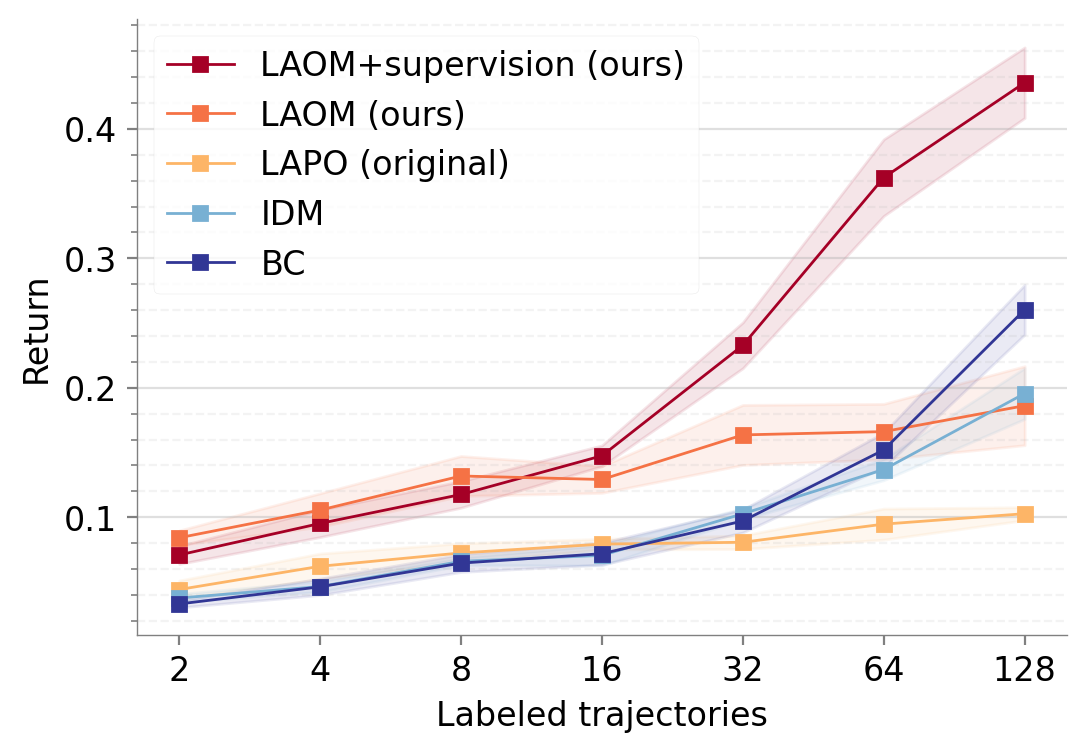

In [23]:
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.serif": "Times",
        "font.weight": "regular",
        "font.size": 12,
        "legend.fontsize": 12,
    }
)
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot()

# swap, to plot Figure 15 (averaged results for environments without distractors)
# result_dict = mean_res_vanilla
# result_dict_std = mean_res_vanilla_std
result_dict = mean_res
result_dict_std = mean_res_std

ax.plot(
    labels,
    result_dict["laom_labeled"],
    "-s",
    label="LAOM+supervision (ours)",
    linewidth=1.0,
    color=lapo_plusl_cl,
    markersize=5.0,
)
ax.fill_between(
    labels,
    result_dict["laom_labeled"] + result_dict_std["laom_labeled"],
    result_dict["laom_labeled"] - result_dict_std["laom_labeled"],
    color=lapo_plusl_cl,
    alpha=0.1,
)

ax.plot(labels, result_dict["laom"], "-s", label="LAOM (ours)", linewidth=1.0, color=lapo_plus_cl, markersize=5.0)
ax.fill_between(
    labels,
    result_dict["laom"] + result_dict_std["laom"],
    result_dict["laom"] - result_dict_std["laom"],
    color=lapo_plus_cl,
    alpha=0.1,
)

ax.plot(labels, result_dict["lapo"], "-s", label="LAPO (original)", linewidth=1.0, color=lapo_cl, markersize=5.0)
ax.fill_between(
    labels,
    result_dict["lapo"] + result_dict_std["lapo"],
    result_dict["lapo"] - result_dict_std["lapo"],
    color=lapo_cl,
    alpha=0.1,
)

ax.plot(labels, result_dict["idm"], "-s", label="IDM", linewidth=1.0, color=idm_cl, markersize=5.0)
ax.fill_between(
    labels,
    result_dict["idm"] + result_dict_std["idm"],
    result_dict["idm"] - result_dict_std["idm"],
    color=idm_cl,
    alpha=0.1,
)

ax.plot(labels, result_dict["bc"], "-s", label="BC", linewidth=1.0, color=bc_cl, markersize=5.0)
ax.fill_between(
    labels, result_dict["bc"] + result_dict_std["bc"], result_dict["bc"] - result_dict_std["bc"], color=bc_cl, alpha=0.1
)

# ax.plot(labels, humanoid_norm['laom_labeled'], "-s", label="LAPO+labels", linewidth=1.0, color=lapo_plusl_cl, markersize=5.0);
# ax.plot(labels, humanoid_norm['laom'], "-s", label="LAPO+", linewidth=1.0, color=lapo_plus_cl, markersize=5.0);
# ax.plot(labels, humanoid_norm['lapo'], "-s", label="LAPO", linewidth=1.0, color=lapo_cl, markersize=5.0);
# ax.plot(labels, humanoid_norm['idm'], "-s", label="IDM", linewidth=1.0, color=idm_cl, markersize=5.0);
# ax.plot(labels, humanoid_norm['bc'], "-s", label="BC", linewidth=1.0, color=bc_cl, markersize=5.0);

# ax.plot(labels, walker_norm['laom_labeled'], "-s", label="LAPO+labels", linewidth=1.0, color=lapo_plusl_cl, markersize=5.0);
# ax.plot(labels, walker_norm['laom'], "-s", label="LAPO+", linewidth=1.0, color=lapo_plus_cl, markersize=5.0);
# ax.plot(labels, walker_norm['lapo'], "-s", label="LAPO", linewidth=1.0, color=lapo_cl, markersize=5.0);
# ax.plot(labels, walker_norm['idm'], "-s", label="IDM", linewidth=1.0, color=idm_cl, markersize=5.0);
# ax.plot(labels, walker_norm['bc'], "-s", label="BC", linewidth=1.0, color=bc_cl, markersize=5.0);

# ax.plot(labels, cheetah_norm['laom_labeled'], "-s", label="LAPO+labels", linewidth=1.0, color=lapo_plusl_cl, markersize=5.0);
# ax.plot(labels, cheetah_norm['laom'], "-s", label="LAPO+", linewidth=1.0, color=lapo_plus_cl, markersize=5.0);
# ax.plot(labels, cheetah_norm['lapo'], "-s", label="LAPO", linewidth=1.0, color=lapo_cl, markersize=5.0);
# ax.plot(labels, cheetah_norm['idm'], "-s", label="IDM", linewidth=1.0, color=idm_cl, markersize=5.0);
# ax.plot(labels, cheetah_norm['bc'], "-s", label="BC", linewidth=1.0, color=bc_cl, markersize=5.0);

# ax.plot(labels, hopper_norm['laom_labeled'], "-s", label="LAPO+labels", linewidth=1.0, color=lapo_plusl_cl, markersize=5.0);
# ax.plot(labels, hopper_norm['laom'], "-s", label="LAPO+", linewidth=1.0, color=lapo_plus_cl, markersize=5.0);
# ax.plot(labels, hopper_norm['lapo'], "-s", label="LAPO", linewidth=1.0, color=lapo_cl, markersize=5.0);
# ax.plot(labels, hopper_norm['idm'], "-s", label="IDM", linewidth=1.0, color=idm_cl, markersize=5.0);
# ax.plot(labels, hopper_norm['bc'], "-s", label="BC", linewidth=1.0, color=bc_cl, markersize=5.0);

ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# ax.yaxis.set_major_locator(MultipleLocator(100))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# ax.axhline(y=563.25, color='gray', linestyle='-')

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which="major", linestyle="-", axis="y", alpha=0.4)
# ax.grid(which='minor', linestyle=(5, (10, 3)), axis="y", alpha=0.25)
ax.grid(which="minor", linestyle="--", axis="y", alpha=0.15)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xscale("log", base=2)
ax.set_xticks(labels, labels=labels)
ax.tick_params(color="gray", which="both")
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_color("gray")
    ax.spines[axis].set_linewidth(0.5)

leg = plt.legend(loc="upper left")
leg.get_frame().set_linewidth(0.1)

ax.set_ylabel("Return")
# ax.set_ylabel("Normalized Return")
ax.set_xlabel("Labeled trajectories");

# plt.savefig("plots/humanoid.png", bbox_inches='tight', dpi=200)
# plt.savefig("plots/humanoid.pdf", bbox_inches='tight', dpi=200, format="pdf")

# plt.savefig("plots/final-vanilla-averaged-res-raw.png", bbox_inches='tight', dpi=200)
# plt.savefig("plots/final-vanilla-averaged-res-raw.pdf", bbox_inches='tight', dpi=200, format="pdf")
# plt.savefig("plots/final-averaged-res-raw.png", bbox_inches='tight', dpi=200)
# plt.savefig("plots/final-averaged-res-raw.pdf", bbox_inches='tight', dpi=200, format="pdf")

# Reproducing Figure 8

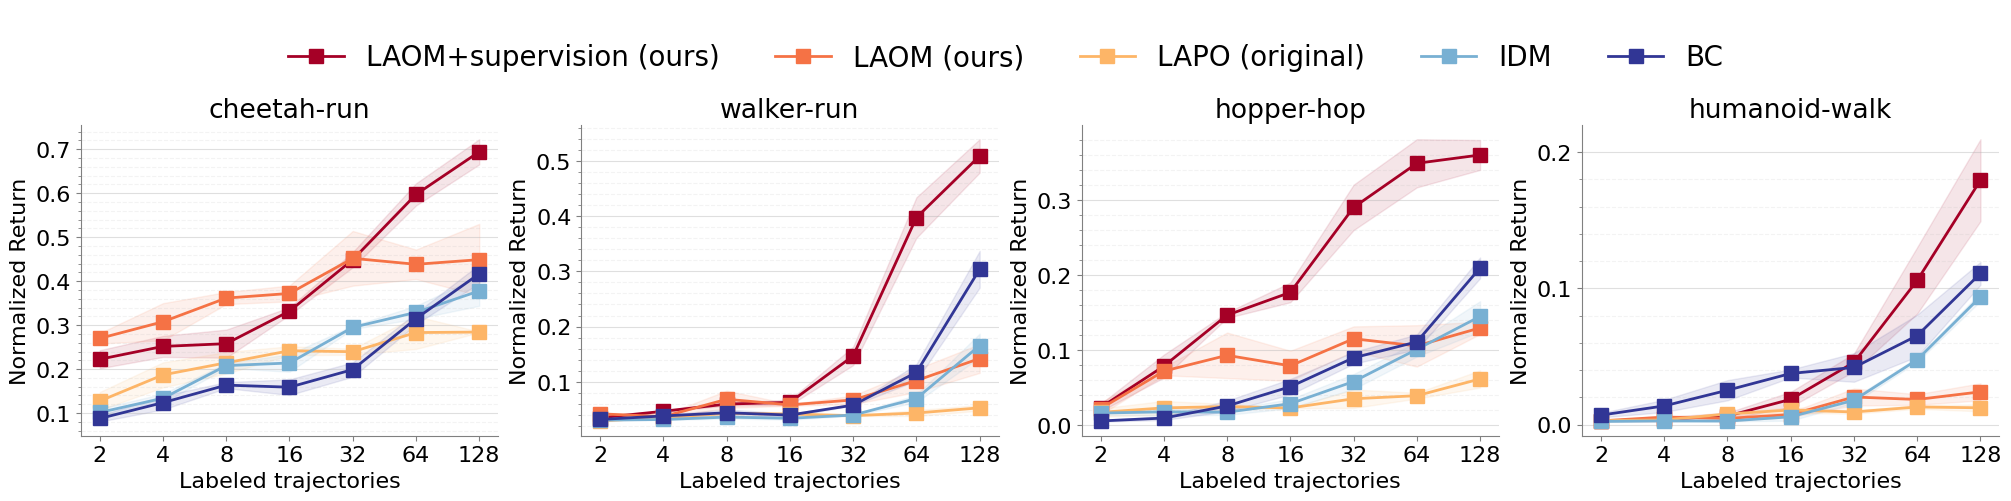

In [14]:
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.serif": "Times",
        "font.weight": "regular",
        "font.size": 16,
        "legend.fontsize": 20,
    }
)
fig, axs = plt.subplots(1, 4, figsize=(20, 5), layout="constrained")

for ax, res, res_std, title in zip(
    axs,
    [cheetah_norm, walker_norm, hopper_norm, humanoid_norm],
    [cheetah_std_norm, walker_std_norm, hopper_std_norm, humanoid_std_norm],
    ["cheetah-run", "walker-run", "hopper-hop", "humanoid-walk"],
):
    if title == "cheetah-run":
        ax.plot(
            labels,
            res["laom_labeled"],
            "-s",
            label="LAOM+supervision (ours)",
            linewidth=2.0,
            color=lapo_plusl_cl,
            markersize=10.0,
        )
        ax.fill_between(
            labels,
            res["laom_labeled"] + res_std["laom_labeled"],
            res["laom_labeled"] - res_std["laom_labeled"],
            color=lapo_plusl_cl,
            alpha=0.1,
        )

        ax.plot(labels, res["laom"], "-s", label="LAOM (ours)", linewidth=2.0, color=lapo_plus_cl, markersize=10.0)
        ax.fill_between(
            labels, res["laom"] + res_std["laom"], res["laom"] - res_std["laom"], color=lapo_plus_cl, alpha=0.1
        )

        ax.plot(labels, res["lapo"], "-s", label="LAPO (original)", linewidth=2.0, color=lapo_cl, markersize=10.0)
        ax.fill_between(labels, res["lapo"] + res_std["lapo"], res["lapo"] - res_std["lapo"], color=lapo_cl, alpha=0.1)

        ax.plot(labels, res["idm"], "-s", label="IDM", linewidth=2.0, color=idm_cl, markersize=10.0)
        ax.fill_between(labels, res["idm"] + res_std["idm"], res["idm"] - res_std["idm"], color=idm_cl, alpha=0.1)

        ax.plot(labels, res["bc"], "-s", label="BC", linewidth=2.0, color=bc_cl, markersize=10.0)
        ax.fill_between(labels, res["bc"] + res_std["bc"], res["bc"] - res_std["bc"], color=bc_cl, alpha=0.1)
    else:
        ax.plot(labels, res["laom_labeled"], "-s", linewidth=2.0, color=lapo_plusl_cl, markersize=10.0)
        ax.fill_between(
            labels,
            res["laom_labeled"] + res_std["laom_labeled"],
            res["laom_labeled"] - res_std["laom_labeled"],
            color=lapo_plusl_cl,
            alpha=0.1,
        )

        ax.plot(labels, res["laom"], "-s", linewidth=2.0, color=lapo_plus_cl, markersize=10.0)
        ax.fill_between(
            labels, res["laom"] + res_std["laom"], res["laom"] - res_std["laom"], color=lapo_plus_cl, alpha=0.1
        )

        ax.plot(labels, res["lapo"], "-s", linewidth=2.0, color=lapo_cl, markersize=10.0)
        ax.fill_between(labels, res["lapo"] + res_std["lapo"], res["lapo"] - res_std["lapo"], color=lapo_cl, alpha=0.1)

        ax.plot(labels, res["idm"], "-s", linewidth=2.0, color=idm_cl, markersize=10.0)
        ax.fill_between(labels, res["idm"] + res_std["idm"], res["idm"] - res_std["idm"], color=idm_cl, alpha=0.1)

        ax.plot(labels, res["bc"], "-s", linewidth=2.0, color=bc_cl, markersize=10.0)
        ax.fill_between(labels, res["bc"] + res_std["bc"], res["bc"] - res_std["bc"], color=bc_cl, alpha=0.1)

    ax.set_title(title)

    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid(which="major", linestyle="-", axis="y", alpha=0.4)
    ax.grid(which="minor", linestyle="--", axis="y", alpha=0.15)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_xscale("log", base=2)
    ax.set_xticks(labels, labels=labels)
    ax.tick_params(color="gray", which="both")
    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_color("gray")

    ax.set_ylabel("Normalized Return")
    ax.set_xlabel("Labeled trajectories")

leg = fig.legend(ncols=5, loc="outside upper center", borderpad=1.1, frameon=False)
leg.get_frame().set_linewidth(0.0)

# Reproducing Figure 13

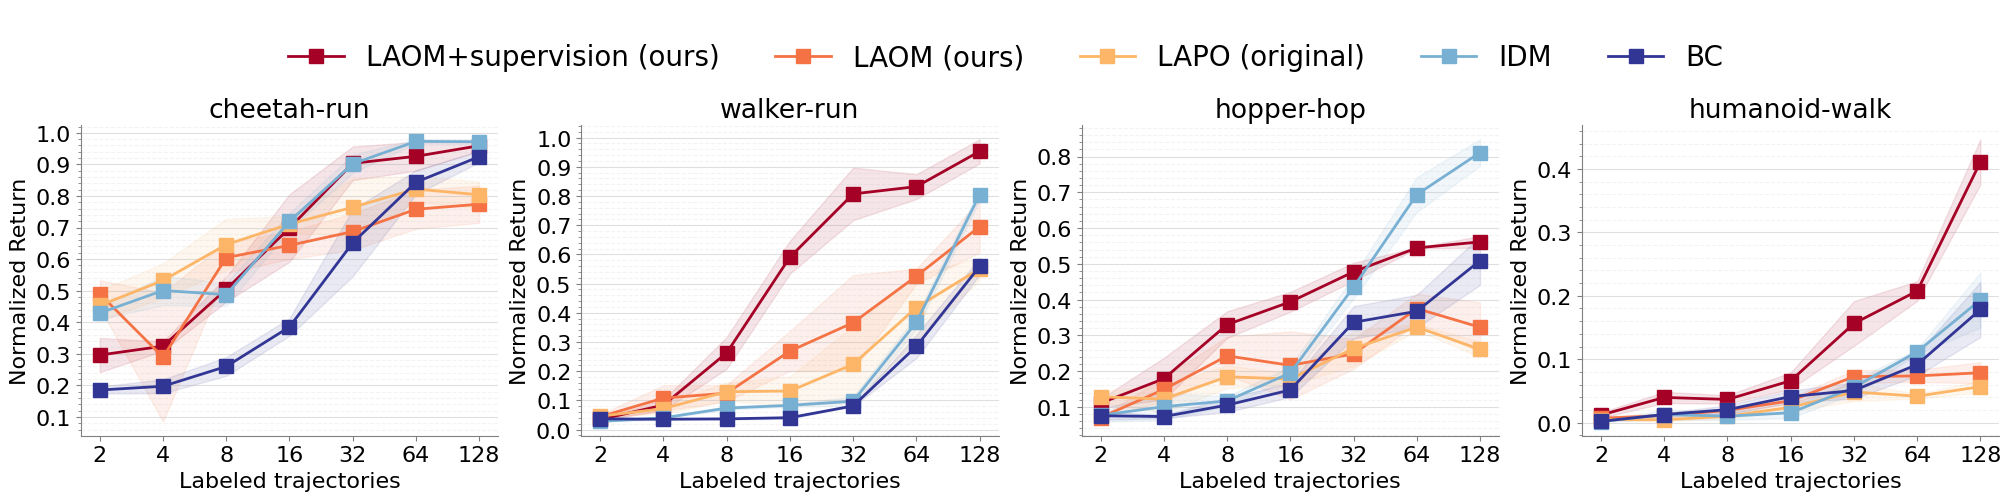

In [25]:
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.serif": "Times",
        "font.weight": "regular",
        "font.size": 16,
        "legend.fontsize": 20,
    }
)
fig, axs = plt.subplots(1, 4, figsize=(20, 5), layout="constrained")

for ax, res, res_std, title in zip(
    axs,
    [cheetah_vanilla_norm, walker_vanilla_norm, hopper_vanilla_norm, humanoid_vanilla_norm],
    [cheetah_vanilla_std_norm, walker_vanilla_std_norm, hopper_vanilla_std_norm, humanoid_vanilla_std_norm],
    ["cheetah-run", "walker-run", "hopper-hop", "humanoid-walk"],
):
    if title == "cheetah-run":
        ax.plot(
            labels,
            res["laom_labeled"],
            "-s",
            label="LAOM+supervision (ours)",
            linewidth=2.0,
            color=lapo_plusl_cl,
            markersize=10.0,
        )
        ax.fill_between(
            labels,
            res["laom_labeled"] + res_std["laom_labeled"],
            res["laom_labeled"] - res_std["laom_labeled"],
            color=lapo_plusl_cl,
            alpha=0.1,
        )

        ax.plot(labels, res["laom"], "-s", label="LAOM (ours)", linewidth=2.0, color=lapo_plus_cl, markersize=10.0)
        ax.fill_between(
            labels, res["laom"] + res_std["laom"], res["laom"] - res_std["laom"], color=lapo_plus_cl, alpha=0.1
        )

        ax.plot(labels, res["lapo"], "-s", label="LAPO (original)", linewidth=2.0, color=lapo_cl, markersize=10.0)
        ax.fill_between(labels, res["lapo"] + res_std["lapo"], res["lapo"] - res_std["lapo"], color=lapo_cl, alpha=0.1)

        ax.plot(labels, res["idm"], "-s", label="IDM", linewidth=2.0, color=idm_cl, markersize=10.0)
        ax.fill_between(labels, res["idm"] + res_std["idm"], res["idm"] - res_std["idm"], color=idm_cl, alpha=0.1)

        ax.plot(labels, res["bc"], "-s", label="BC", linewidth=2.0, color=bc_cl, markersize=10.0)
        ax.fill_between(labels, res["bc"] + res_std["bc"], res["bc"] - res_std["bc"], color=bc_cl, alpha=0.1)
    else:
        ax.plot(labels, res["laom_labeled"], "-s", linewidth=2.0, color=lapo_plusl_cl, markersize=10.0)
        ax.fill_between(
            labels,
            res["laom_labeled"] + res_std["laom_labeled"],
            res["laom_labeled"] - res_std["laom_labeled"],
            color=lapo_plusl_cl,
            alpha=0.1,
        )

        ax.plot(labels, res["laom"], "-s", linewidth=2.0, color=lapo_plus_cl, markersize=10.0)
        ax.fill_between(
            labels, res["laom"] + res_std["laom"], res["laom"] - res_std["laom"], color=lapo_plus_cl, alpha=0.1
        )

        ax.plot(labels, res["lapo"], "-s", linewidth=2.0, color=lapo_cl, markersize=10.0)
        ax.fill_between(labels, res["lapo"] + res_std["lapo"], res["lapo"] - res_std["lapo"], color=lapo_cl, alpha=0.1)

        ax.plot(labels, res["idm"], "-s", linewidth=2.0, color=idm_cl, markersize=10.0)
        ax.fill_between(labels, res["idm"] + res_std["idm"], res["idm"] - res_std["idm"], color=idm_cl, alpha=0.1)

        ax.plot(labels, res["bc"], "-s", linewidth=2.0, color=bc_cl, markersize=10.0)
        ax.fill_between(labels, res["bc"] + res_std["bc"], res["bc"] - res_std["bc"], color=bc_cl, alpha=0.1)

    ax.set_title(title)

    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid(which="major", linestyle="-", axis="y", alpha=0.4)
    ax.grid(which="minor", linestyle="--", axis="y", alpha=0.15)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_xscale("log", base=2)
    ax.set_xticks(labels, labels=labels)
    ax.tick_params(color="gray", which="both")
    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_color("gray")

    ax.set_ylabel("Normalized Return")
    ax.set_xlabel("Labeled trajectories")

leg = fig.legend(ncols=5, loc="outside upper center", borderpad=1.1, frameon=False)
leg.get_frame().set_linewidth(0.0)

# Reproducing Figure 7

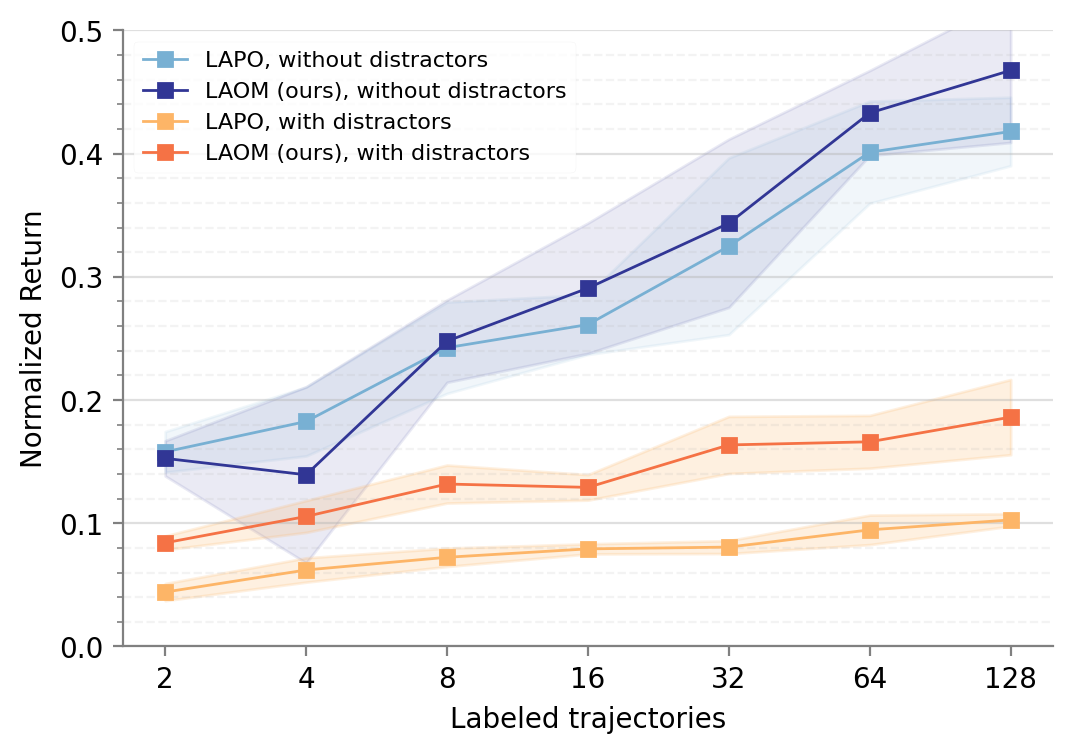

In [27]:
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.serif": "Andale Mono",
        "font.weight": "regular",
        "font.size": 10,
        "legend.fontsize": 8,
    }
)
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot()

ax.plot(
    labels,
    mean_res_vanilla["lapo"],
    "-s",
    label="LAPO, without distractors",
    color=idm_cl,
    linewidth=1.0,
    markersize=5.0,
)
ax.fill_between(
    labels,
    mean_res_vanilla["lapo"] + mean_res_vanilla_std["lapo"],
    mean_res_vanilla["lapo"] - mean_res_vanilla_std["lapo"],
    color=idm_cl,
    alpha=0.1,
)

ax.plot(
    labels,
    mean_res_vanilla["laom"],
    "-s",
    label="LAOM (ours), without distractors",
    color=bc_cl,
    linewidth=1.0,
    markersize=5.0,
)
ax.fill_between(
    labels,
    mean_res_vanilla["laom"] + mean_res_vanilla_std["laom"],
    mean_res_vanilla["laom"] - mean_res_vanilla_std["laom"],
    color=bc_cl,
    alpha=0.1,
)

ax.plot(labels, mean_res["lapo"], "-s", label="LAPO, with distractors", color=lapo_cl, linewidth=1.0, markersize=5.0)
ax.fill_between(
    labels, mean_res["lapo"] + mean_res_std["lapo"], mean_res["lapo"] - mean_res_std["lapo"], color=lapo_cl, alpha=0.2
)

ax.plot(
    labels,
    mean_res["laom"],
    "-s",
    label="LAOM (ours), with distractors",
    color=lapo_plus_cl,
    linewidth=1.0,
    markersize=5.0,
)
ax.fill_between(
    labels, mean_res["laom"] + mean_res_std["laom"], mean_res["laom"] - mean_res_std["laom"], color=lapo_cl, alpha=0.2
)

ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.grid(which="major", linestyle="-", axis="y", alpha=0.4)
ax.grid(which="minor", linestyle="--", axis="y", alpha=0.15)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xscale("log", base=2)
ax.set_xticks(labels, labels=labels)
ax.tick_params(color="gray", which="both")
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_color("gray")

leg = plt.legend(loc="upper left", frameon=True)
leg.get_frame().set_linewidth(0.05)

ax.set_ylim(0, 0.5)
ax.set_ylabel("Normalized Return")
ax.set_xlabel("Labeled trajectories");

# Reproducing Figure 10

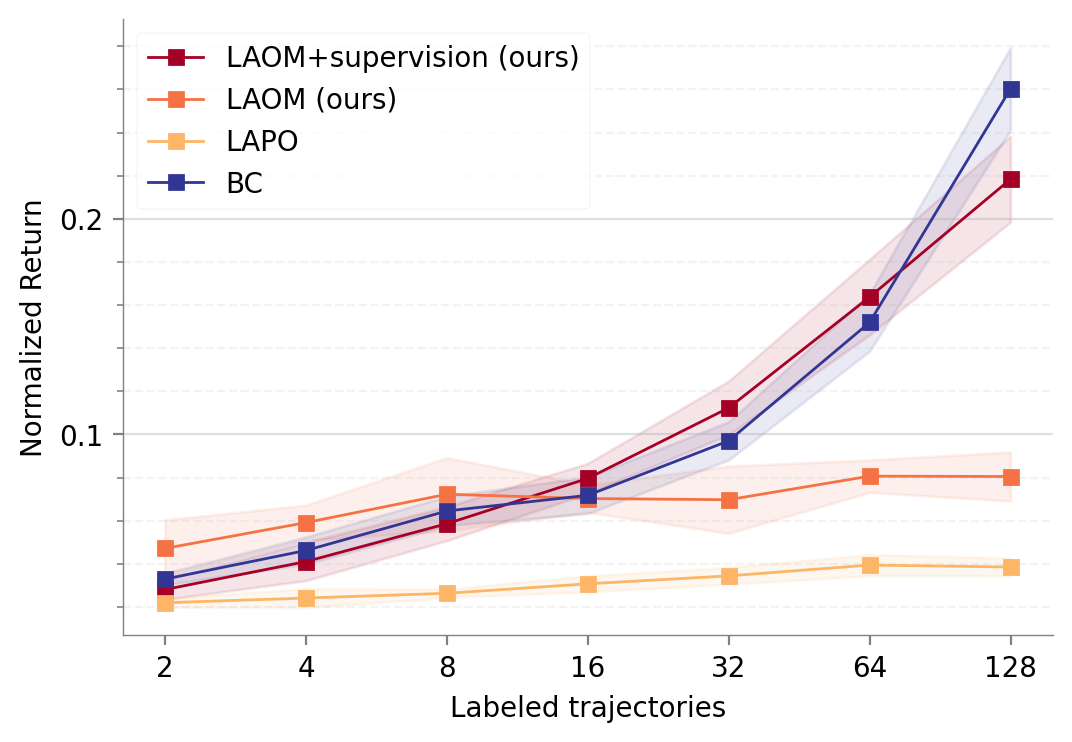

In [31]:
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.serif": "Andale Mono",
        "font.weight": "regular",
        "font.size": 10,
        "legend.fontsize": 10,
    }
)
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot()

ax.plot(
    labels,
    mean_res_mixed["laom_labeled"],
    "-s",
    label="LAOM+supervision (ours)",
    linewidth=1.0,
    color=lapo_plusl_cl,
    markersize=5.0,
)
ax.fill_between(
    labels,
    mean_res_mixed["laom_labeled"] + mean_res_mixed_std["laom_labeled"],
    mean_res_mixed["laom_labeled"] - mean_res_mixed_std["laom_labeled"],
    color=lapo_plusl_cl,
    alpha=0.1,
)

ax.plot(labels, mean_res_mixed["laom"], "-s", label="LAOM (ours)", linewidth=1.0, color=lapo_plus_cl, markersize=5.0)
ax.fill_between(
    labels,
    mean_res_mixed["laom"] + mean_res_mixed_std["laom"],
    mean_res_mixed["laom"] - mean_res_mixed_std["laom"],
    color=lapo_plus_cl,
    alpha=0.1,
)

ax.plot(labels, mean_res_mixed["lapo"], "-s", label="LAPO", linewidth=1.0, color=lapo_cl, markersize=5.0)
ax.fill_between(
    labels,
    mean_res_mixed["lapo"] + mean_res_mixed_std["lapo"],
    mean_res_mixed["lapo"] - mean_res_mixed_std["lapo"],
    color=lapo_cl,
    alpha=0.1,
)

ax.plot(labels, mean_res["bc"], "-s", label="BC", linewidth=1.0, color=bc_cl, markersize=5.0)
ax.fill_between(
    labels, mean_res["bc"] + mean_res_std["bc"], mean_res["bc"] - mean_res_std["bc"], color=bc_cl, alpha=0.1
)

ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which="major", linestyle="-", axis="y", alpha=0.4)
# ax.grid(which='minor', linestyle=(5, (10, 3)), axis="y", alpha=0.25)
ax.grid(which="minor", linestyle="--", axis="y", alpha=0.15)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xscale("log", base=2)
ax.set_xticks(labels, labels=labels)
ax.tick_params(color="gray", which="both")
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_color("gray")
    ax.spines[axis].set_linewidth(0.5)

leg = plt.legend(loc="upper left")
leg.get_frame().set_linewidth(0.1)

ax.set_ylabel("Normalized Return")
ax.set_xlabel("Labeled trajectories");

# Reproducing Figure 14

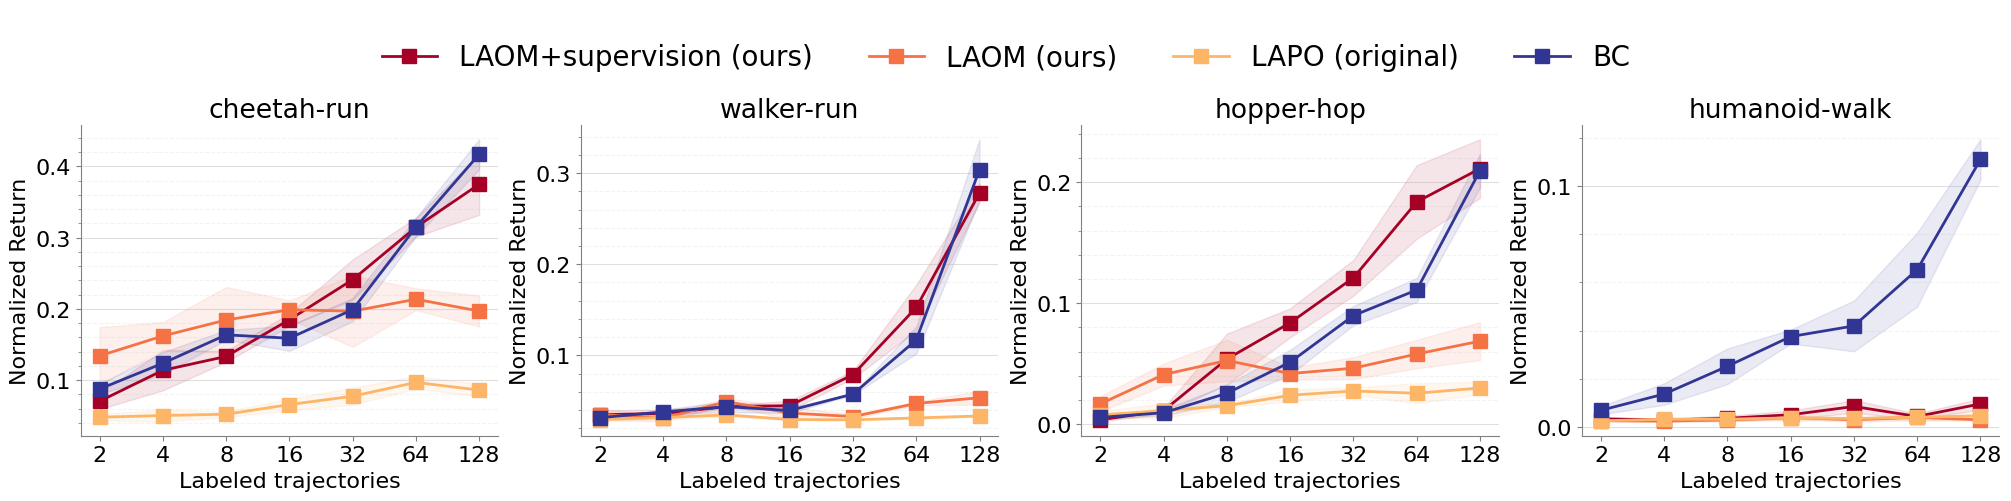

In [32]:
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.serif": "Times",
        "font.weight": "regular",
        "font.size": 16,
        "legend.fontsize": 20,
    }
)

# fig, axs = plt.subplots(1, 4, figsize=(20, 5), layout='constrained')
fig, axs = plt.subplots(1, 4, figsize=(20, 5), layout="constrained")

for ax, res, res_std, bc_res, bc_std, title in zip(
    axs,
    [cheetah_mixed_norm, walker_mixed_norm, hopper_mixed_norm, humanoid_mixed_norm],
    [cheetah_mixed_std_norm, walker_mixed_std_norm, hopper_mixed_std_norm, humanoid_mixed_std_norm],
    [cheetah_norm, walker_norm, hopper_norm, humanoid_norm],
    [cheetah_std_norm, walker_std_norm, hopper_std_norm, humanoid_std_norm],
    ["cheetah-run", "walker-run", "hopper-hop", "humanoid-walk"],
):
    if title == "cheetah-run":
        ax.plot(
            labels,
            res["laom_labeled"],
            "-s",
            label="LAOM+supervision (ours)",
            linewidth=2.0,
            color=lapo_plusl_cl,
            markersize=10.0,
        )
        ax.fill_between(
            labels,
            res["laom_labeled"] + res_std["laom_labeled"],
            res["laom_labeled"] - res_std["laom_labeled"],
            color=lapo_plusl_cl,
            alpha=0.1,
        )

        ax.plot(labels, res["laom"], "-s", label="LAOM (ours)", linewidth=2.0, color=lapo_plus_cl, markersize=10.0)
        ax.fill_between(
            labels, res["laom"] + res_std["laom"], res["laom"] - res_std["laom"], color=lapo_plus_cl, alpha=0.1
        )

        ax.plot(labels, res["lapo"], "-s", label="LAPO (original)", linewidth=2.0, color=lapo_cl, markersize=10.0)
        ax.fill_between(labels, res["lapo"] + res_std["lapo"], res["lapo"] - res_std["lapo"], color=lapo_cl, alpha=0.1)

        ax.plot(labels, bc_res["bc"], "-s", label="BC", linewidth=2.0, color=bc_cl, markersize=10.0)
        ax.fill_between(labels, bc_res["bc"] + bc_std["bc"], bc_res["bc"] - bc_std["bc"], color=bc_cl, alpha=0.1)
    else:
        ax.plot(labels, res["laom_labeled"], "-s", linewidth=2.0, color=lapo_plusl_cl, markersize=10.0)
        ax.fill_between(
            labels,
            res["laom_labeled"] + res_std["laom_labeled"],
            res["laom_labeled"] - res_std["laom_labeled"],
            color=lapo_plusl_cl,
            alpha=0.1,
        )

        ax.plot(labels, res["laom"], "-s", linewidth=2.0, color=lapo_plus_cl, markersize=10.0)
        ax.fill_between(
            labels, res["laom"] + res_std["laom"], res["laom"] - res_std["laom"], color=lapo_plus_cl, alpha=0.1
        )

        ax.plot(labels, res["lapo"], "-s", linewidth=2.0, color=lapo_cl, markersize=10.0)
        ax.fill_between(labels, res["lapo"] + res_std["lapo"], res["lapo"] - res_std["lapo"], color=lapo_cl, alpha=0.1)

        ax.plot(labels, bc_res["bc"], "-s", linewidth=2.0, color=bc_cl, markersize=10.0)
        ax.fill_between(labels, bc_res["bc"] + bc_std["bc"], bc_res["bc"] - bc_std["bc"], color=bc_cl, alpha=0.1)

    ax.set_title(title)

    # if title == "humanoid-walk":
    # ax.yaxis.set_major_locator(MultipleLocator(0.005))
    # else:
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid(which="major", linestyle="-", axis="y", alpha=0.4)
    ax.grid(which="minor", linestyle="--", axis="y", alpha=0.15)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_xscale("log", base=2)
    ax.set_xticks(labels, labels=labels)
    ax.tick_params(color="gray", which="both")
    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_color("gray")

    ax.set_ylabel("Normalized Return")
    ax.set_xlabel("Labeled trajectories")

leg = fig.legend(ncols=5, loc="outside upper center", borderpad=1.1, frameon=False)
leg.get_frame().set_linewidth(0.0)

# Reproducing Figure 5

In [41]:
dist_datasets = [
    "/home/jovyan/nikulin/lapo-data/hopper-hop-scale-easy-video-hard-64px-5k.hdf5",
    "/home/jovyan/nikulin/lapo-data/walker-run-scale-easy-video-hard-64px-5k.hdf5",
    "/home/jovyan/nikulin/lapo-data/cheetah-run-scale-easy-video-hard-64px-5k.hdf5",
    "/home/jovyan/nikulin/lapo-data/humanoid-walk-scale-easy-video-hard-64px-5k.hdf5",
]
vanilla_datasets = [
    "/home/jovyan/nikulin/lapo-data/hopper-hop-vanilla-64px-5k.hdf5",
    "/home/jovyan/nikulin/lapo-data/walker-run-vanilla-64px-5k.hdf5",
    "/home/jovyan/nikulin/lapo-data/cheetah-run-vanilla-64px-5k.hdf5",
    "/home/jovyan/nikulin/lapo-data/humanoid-walk-vanilla-64px-5k.hdf5",
]

lapo_fsq_sweep_runs = [run for run in runs if hasattr(run.sweep, "id") and run.sweep.id == "9ipsv4dm"]
lapo_sweep_runs = [run for run in runs if hasattr(run.sweep, "id") and run.sweep.id == "wtiv38e9"]

# for baselines mse scores
bc_sweep_runs = [run for run in runs if hasattr(run.sweep, "id") and run.sweep.id == "a49evsh6"]
bc_dist_runs = [run for run in bc_sweep_runs if "hard" in run.config["data_path"]]
bc_vanilla_runs = [run for run in bc_sweep_runs if "vanilla" in run.config["data_path"]]


vanilla_lapo_fsq_runs = [
    run
    for run in lapo_fsq_sweep_runs
    if (
        run.config["data_path"] in vanilla_datasets
        and run.config["latent_action_dim"] == 128
        and run.config["fsq_levels"] == [4, 4, 4, 4]
        and run.config["future_obs_offset"] == 1
    )
]
dist_lapo_fsq_runs = [
    run
    for run in lapo_fsq_sweep_runs
    if (
        run.config["data_path"] in dist_datasets
        and run.config["latent_action_dim"] == 128
        and run.config["fsq_levels"] == [4, 4, 4, 4]
        and run.config["future_obs_offset"] == 1
    )
]

vanilla_lapo_runs = [
    run
    for run in lapo_sweep_runs
    if (
        run.config["data_path"] in vanilla_datasets
        and run.config["latent_action_dim"] == 128
        and run.config["future_obs_offset"] == 1
    )
]
dist_lapo_runs = [
    run
    for run in lapo_sweep_runs
    if (
        run.config["data_path"] in dist_datasets
        and run.config["latent_action_dim"] == 128
        and run.config["future_obs_offset"] == 1
    )
]

(0.0, 33.0)

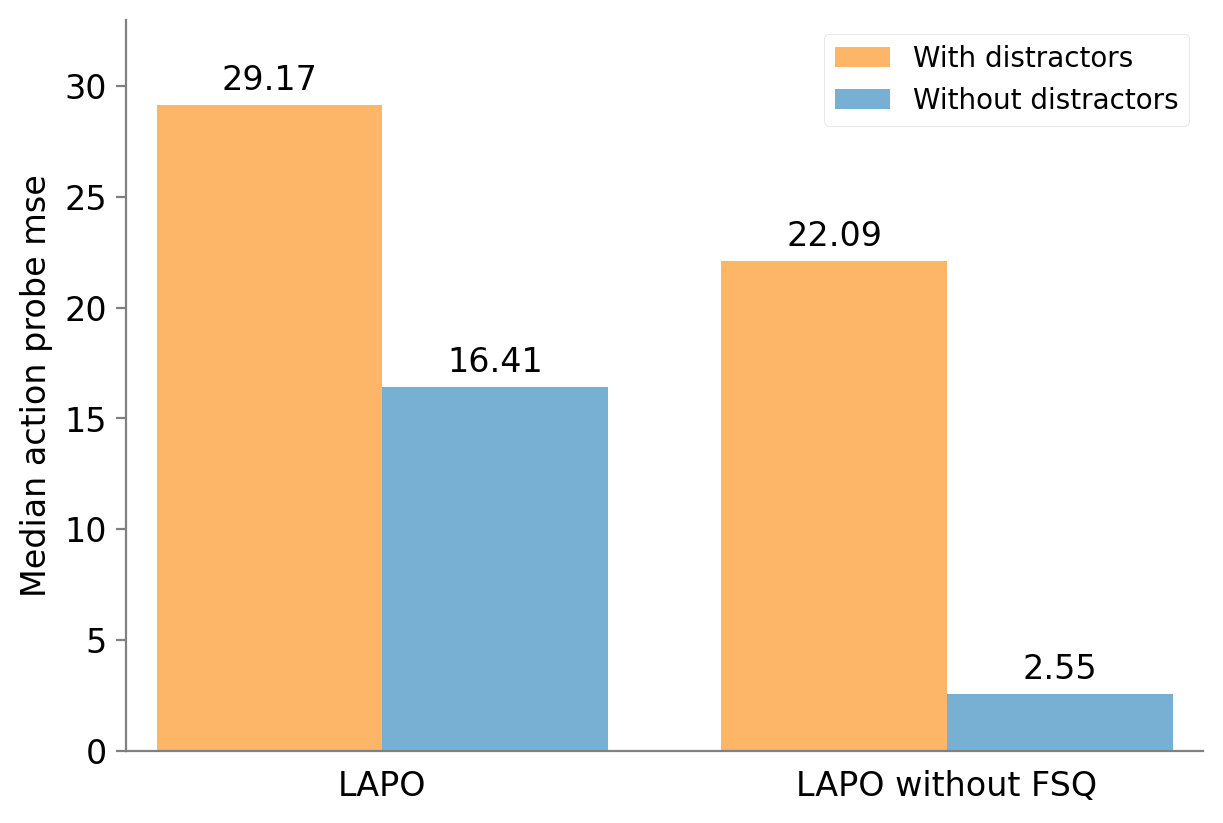

In [43]:
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.serif": "Andale Mono",
        "font.weight": "regular",
        "font.size": 12,
        "legend.fontsize": 10,
    }
)

labels = ("LAPO", "LAPO without FSQ")
values = {
    "With distractors": (
        np.median([run.summary["action_probe_mse_loss"] for run in dist_lapo_fsq_runs]),
        np.median([run.summary["action_probe_mse_loss"] for run in dist_lapo_runs]),
    ),
    "Without distractors": (
        np.median([run.summary["action_probe_mse_loss"] for run in vanilla_lapo_fsq_runs]),
        np.median([run.summary["action_probe_mse_loss"] for run in vanilla_lapo_runs]),
    ),
}
colors = [lapo_cl, idm_cl, bc_cl]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout="constrained", figsize=(6, 4), dpi=200)
for (attribute, measurement), color in zip(values.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3, fmt="{:.2f}")
    multiplier += 1

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(
    axis="x",  # changes apply to the x-axis
    which="both",  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labelbottom=True,  # labels along the bottom edge are off
)
ax.set_ylabel("Median action probe mse")
ax.set_xticks(x + width, labels)

ax.tick_params(color="gray", which="both")
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_color("gray")

leg = plt.legend(loc="upper right")
leg.get_frame().set_linewidth(0.2)

ax.margins(0.03)
ax.set_ylim(0, 33)

# Reproducing Figure 6

In [45]:
lapo_fsq_sweep_runs = [run for run in runs if hasattr(run.sweep, "id") and run.sweep.id == "9ipsv4dm"]
lapo_sweep_runs = [run for run in runs if hasattr(run.sweep, "id") and run.sweep.id == "wtiv38e9"]
lapo_plus_sweep_runs = [run for run in runs if hasattr(run.sweep, "id") and run.sweep.id == "0jqo2tq0"]

result0 = [
    run
    for run in lapo_fsq_sweep_runs
    if (
        run.config["data_path"] in dist_datasets
        and run.config["latent_action_dim"] == 128
        and run.config["fsq_levels"] == [4, 4, 4, 4]
        and run.config["future_obs_offset"] == 1
    )
]

result1 = [
    run
    for run in lapo_sweep_runs
    if (
        run.config["data_path"] in dist_datasets
        and run.config["latent_action_dim"] == 128
        and run.config["future_obs_offset"] == 1
    )
]

result2 = [
    run
    for run in lapo_sweep_runs
    if (
        run.config["data_path"] in dist_datasets
        and run.config["latent_action_dim"] == 128
        and run.config["future_obs_offset"] == 10
    )
]

result3 = [
    run
    for run in lapo_sweep_runs
    if (
        run.config["data_path"] in dist_datasets
        and run.config["latent_action_dim"] == 8192
        and run.config["future_obs_offset"] == 10
    )
]

result4 = [
    run
    for run in lapo_plus_sweep_runs
    if (
        run.config["data_path"] in dist_datasets
        and run.config["encoder_norm_out"] == True
        and run.config["latent_action_dim"] == 8192
        and run.config["future_obs_offset"] == 10
        and run.config["use_aug"] == False
    )
]

result5 = [
    run
    for run in lapo_plus_sweep_runs
    if (
        run.config["data_path"] in dist_datasets
        and run.config["encoder_norm_out"] == False
        and run.config["latent_action_dim"] == 8192
        and run.config["future_obs_offset"] == 10
        and run.config["use_aug"] == True
    )
]

baseline_result = [
    run
    for run in lapo_sweep_runs
    if (
        run.config["data_path"] in vanilla_datasets
        and run.config["latent_action_dim"] == 128
        and run.config["future_obs_offset"] == 1
    )
]
final_baseline_result = [
    run
    for run in lapo_plus_sweep_runs
    if (
        run.config["data_path"] in vanilla_datasets
        and run.config["encoder_norm_out"] == False
        and run.config["latent_action_dim"] == 8192
        and run.config["future_obs_offset"] == 10
        and run.config["use_aug"] == True
    )
]

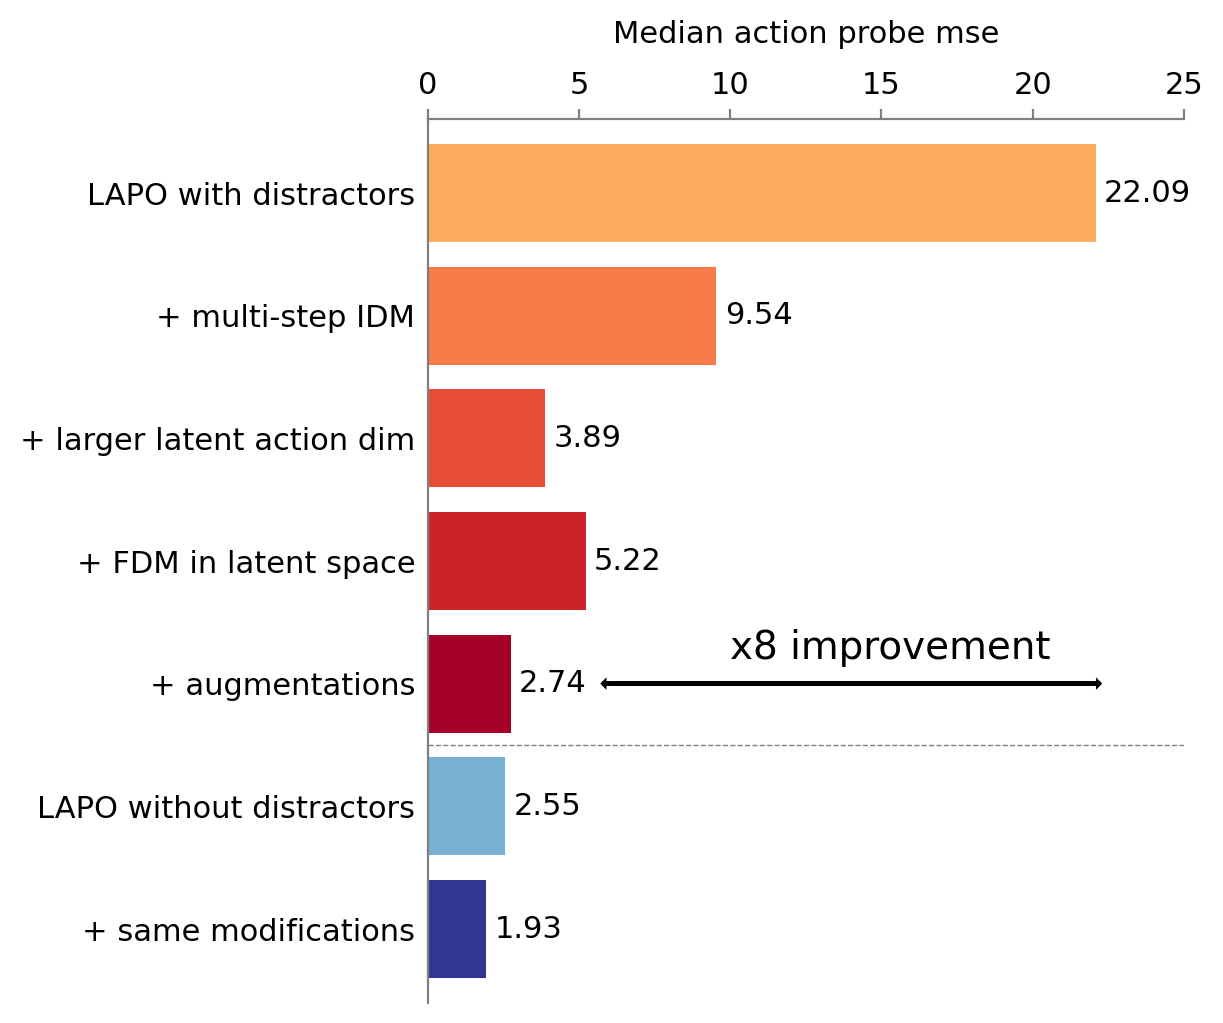

In [47]:
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.serif": "Times",
        "font.weight": "regular",
        "font.size": 11,
    }
)

pos = np.arange(7)
values = [
    np.median([run.summary["action_probe_mse_loss"] for run in result1]),
    np.median([run.summary["action_probe_mse_loss"] for run in result2]),
    np.median([run.summary["action_probe_mse_loss"] for run in result3]),
    np.median([run.summary["action_probe_mse_loss"] for run in result4]),
    np.median([run.summary["action_probe_mse_loss"] for run in result5]),
    np.median([run.summary["action_probe_mse_loss"] for run in baseline_result]),
    np.median([run.summary["action_probe_mse_loss"] for run in final_baseline_result]),
]
labels = [
    "LAPO with distractors",
    "+ multi-step IDM",
    "+ larger latent action dim",
    "+ FDM in latent space",
    "+ augmentations",
    "LAPO without distractors",
    "+ same modifications",
]

cm_ = plt.cm.RdYlBu(np.linspace(0.0, 0.3, 5))
colors = [
    # cm_[5],
    cm_[4],
    cm_[3],
    cm_[2],
    cm_[1],
    cm_[0],
    idm_cl,
    bc_cl,
]

fig, ax = plt.subplots(layout="constrained", figsize=(6, 5), dpi=200)
b = ax.barh(pos, values, color=colors, label=values)
ax.bar_label(b, padding=3, fmt="{:.2f}")

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis="y", left=False, pad=1)
ax.tick_params(color="gray", which="both")
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_color("gray")

ax.set_xlim(0, 25)
ax.margins(0.03)
ax.hlines(y=4.5, xmin=0, xmax=35, linestyle="--", colors="gray", linewidth=0.5)

ax.arrow(
    6.2, 4.0, (21 - 5), 0, head_width=0.02, head_length=0.04, linewidth=1.5, color="black", length_includes_head=True
)
ax.arrow(
    21.8, 4.0, (6 - 22), 0, head_width=0.02, head_length=0.04, linewidth=1.5, color="black", length_includes_head=True
)
ax.text(10.0, 3.8, "x8 improvement", fontsize=14)

ax.set_yticks(pos, labels=labels)
ax.invert_yaxis()

ax.set_xlabel("Median action probe mse", labelpad=10.0)
ax.xaxis.set_label_position("top")

# Reproducing Figure 9(a)

In [48]:
idm_runs = [
    run for run in runs if hasattr(run.sweep, "id") and run.sweep.id in ("dv44m5rv", "6v89skk6", "3mxq9ssr", "pmuogjx6")
]
lapo_plusl_runs = [
    run for run in runs if hasattr(run.sweep, "id") and run.sweep.id in ("cxq1mdoy", "wrd5hdg3", "q9p6718y", "4hji3tld")
]

idm_eval_mse = {
    2: [run.summary["idm/eval_mse_loss"] for run in idm_runs if "1000x2" in run.config["idm.data_path"]],
    4: [run.summary["idm/eval_mse_loss"] for run in idm_runs if "1000x4" in run.config["idm.data_path"]],
    8: [run.summary["idm/eval_mse_loss"] for run in idm_runs if "1000x8" in run.config["idm.data_path"]],
    16: [run.summary["idm/eval_mse_loss"] for run in idm_runs if "1000x16" in run.config["idm.data_path"]],
    32: [run.summary["idm/eval_mse_loss"] for run in idm_runs if "1000x32" in run.config["idm.data_path"]],
    64: [run.summary["idm/eval_mse_loss"] for run in idm_runs if "1000x64" in run.config["idm.data_path"]],
    128: [run.summary["idm/eval_mse_loss"] for run in idm_runs if "1000x128" in run.config["idm.data_path"]],
}
lapo_plusl_eval_mse = {
    2: [
        run.summary["lapo/eval_true_action_mse_loss"]
        for run in lapo_plusl_runs
        if "1000x2" in run.config["lapo.labeled_data_path"]
    ],
    4: [
        run.summary["lapo/eval_true_action_mse_loss"]
        for run in lapo_plusl_runs
        if "1000x4" in run.config["lapo.labeled_data_path"]
    ],
    8: [
        run.summary["lapo/eval_true_action_mse_loss"]
        for run in lapo_plusl_runs
        if "1000x8" in run.config["lapo.labeled_data_path"]
    ],
    16: [
        run.summary["lapo/eval_true_action_mse_loss"]
        for run in lapo_plusl_runs
        if "1000x16" in run.config["lapo.labeled_data_path"]
    ],
    32: [
        run.summary["lapo/eval_true_action_mse_loss"]
        for run in lapo_plusl_runs
        if "1000x32" in run.config["lapo.labeled_data_path"]
    ],
    64: [
        run.summary["lapo/eval_true_action_mse_loss"]
        for run in lapo_plusl_runs
        if "1000x64" in run.config["lapo.labeled_data_path"]
    ],
    128: [
        run.summary["lapo/eval_true_action_mse_loss"]
        for run in lapo_plusl_runs
        if "1000x128" in run.config["lapo.labeled_data_path"]
    ],
}

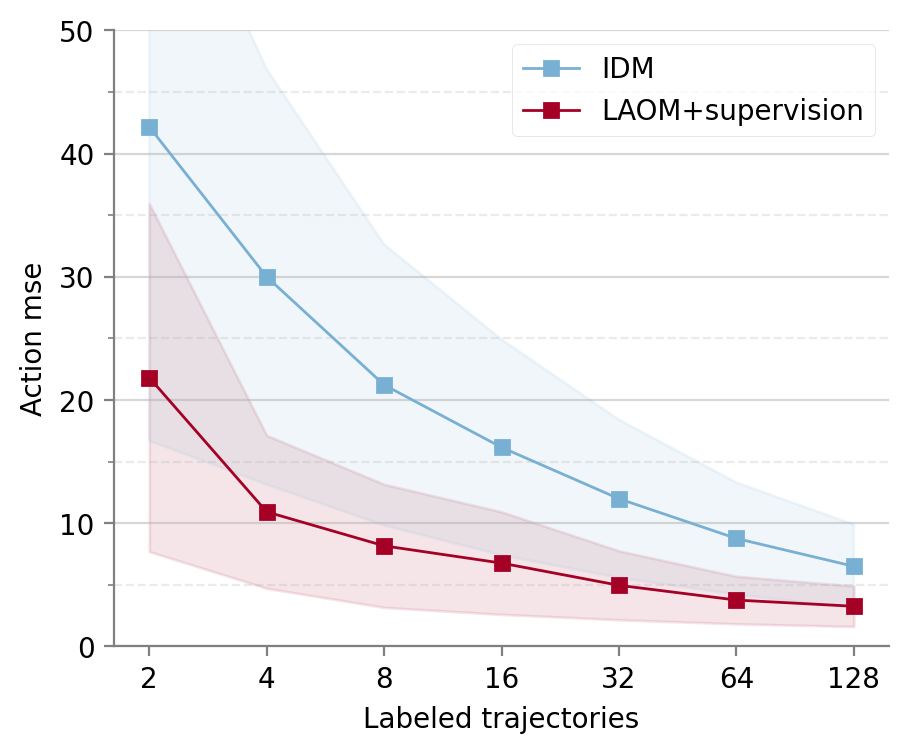

In [50]:
plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.serif": "Andale Mono",
        "font.weight": "regular",
        "font.size": 10,
        "legend.fontsize": 10,
    }
)
fig = plt.figure(figsize=(5, 4), dpi=200)
ax = fig.add_subplot()

num_labels = list(idm_eval_mse.keys())

lapo_plusl_eval_mean = np.array([np.mean(v) for v in lapo_plusl_eval_mse.values()])
lapo_plusl_eval_std = np.array([np.std(v) for v in lapo_plusl_eval_mse.values()])

idm_eval_mean = np.array([np.mean(v) for v in idm_eval_mse.values()])
idm_eval_std = np.array([np.std(v) for v in idm_eval_mse.values()])

ax.plot(
    num_labels, lapo_plusl_eval_mean, "-s", label="LAOM+supervision", color=lapo_plusl_cl, linewidth=1.0, markersize=5.0
)
ax.fill_between(
    num_labels,
    lapo_plusl_eval_mean + lapo_plusl_eval_std,
    lapo_plusl_eval_mean - lapo_plusl_eval_std,
    color=lapo_plusl_cl,
    alpha=0.1,
)

ax.plot(num_labels, idm_eval_mean, "-s", label="IDM", color=idm_cl, linewidth=1.0, markersize=5.0)
ax.fill_between(num_labels, idm_eval_mean + idm_eval_std, idm_eval_mean - idm_eval_std, color=idm_cl, alpha=0.1)

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which="major", linestyle="-", axis="y", alpha=0.5)
ax.grid(which="minor", linestyle="--", axis="y", alpha=0.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xscale("log", base=2)
ax.tick_params(color="gray", which="both")
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_color("gray")

leg = plt.legend(loc="upper right", reverse=True, ncols=1)
leg.get_frame().set_linewidth(0.2)

ax.set_xticks(num_labels, labels=num_labels)
# ax.invert_xaxis()

ax.set_ylim(0, 50.0)
ax.set_ylabel("Action mse")
ax.set_xlabel("Labeled trajectories");